In [1]:
## Basic Setup

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Data
Gender classification csv file 

In [4]:
data=pd.read_csv("gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
data.keys()

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

## what problem we're trying to solve 
we are trying to use the attributes of Humans to predict the gender of the human . specificly we are trying to use features like long_hair,
lips_thin,nose_wide,nose_long ... features of human to predict the gender of the human --> male or female . This is a binary class classification 
problem.

In [6]:
data.groupby('gender').mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


In [7]:
data.shape

(5001, 8)

In [8]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


## Relationship between  features and  target ( gender )

<Axes: xlabel='gender'>

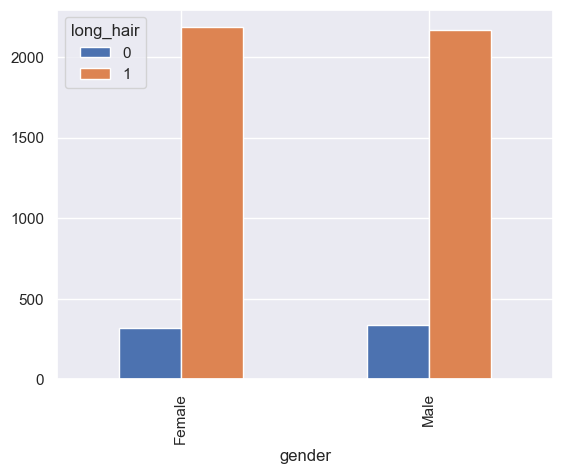

In [9]:
pd.crosstab(data['gender'],data['long_hair']).plot(kind='bar')

<Axes: xlabel='gender'>

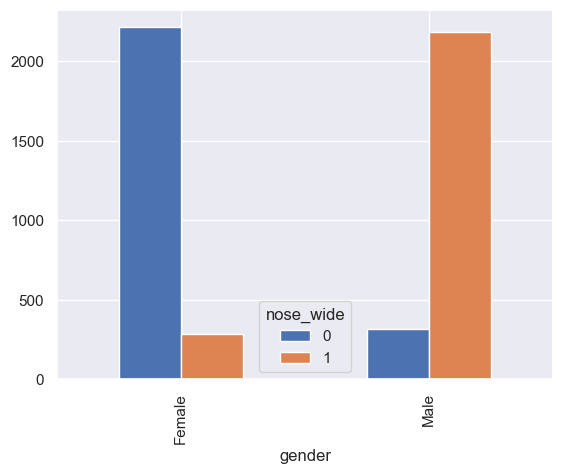

In [10]:
pd.crosstab(data['gender'],data['nose_wide']).plot(kind='bar')


<Axes: xlabel='gender'>

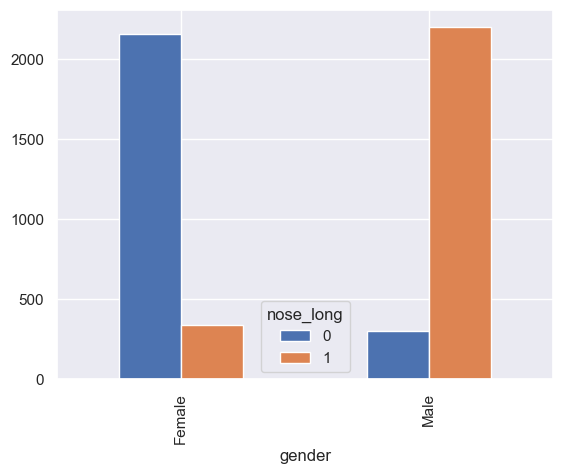

In [11]:
pd.crosstab(data['gender'],data['nose_long']).plot(kind='bar')

<Axes: xlabel='gender'>

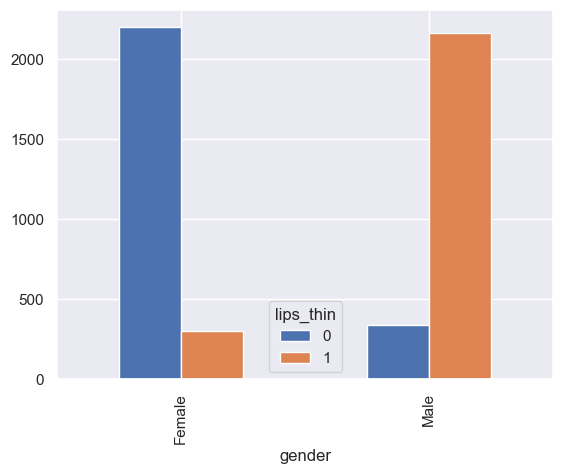

In [12]:
pd.crosstab(data['gender'],data['lips_thin']).plot(kind='bar')

<Axes: xlabel='gender'>

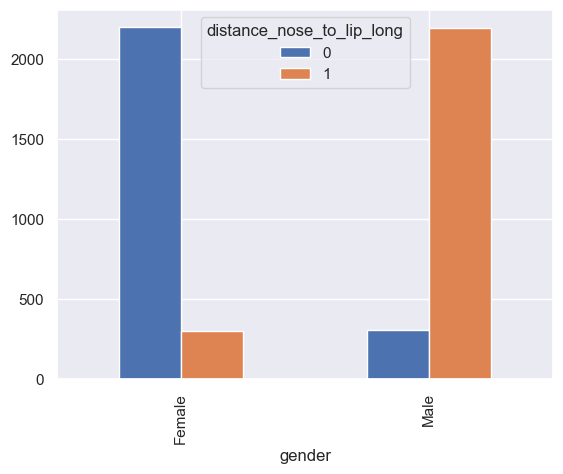

In [13]:
pd.crosstab(data['gender'],data['distance_nose_to_lip_long']).plot(kind='bar')

In [14]:
# from the above bar plot -->
# 1. we can see that almost female and male have long hairs, even females have slightly more number of percent but we cannot 
# predict from this, the gender of humans 
# 2. so from the above bar plot we clearly see that males have wide nose when compared with females .
# 3. so from the above bar plot we clearly see that males have long nose when compared with females .
# 4. so from the above bar plot we clearly see that males have thin lips when compared with females .
# 5. so we can clearly see that the distance between nose to lip is greater in males than in females .

## Train Test Split

In [15]:
# The train_test_split function from scikit-learn is a convenient utility 
# for splitting a dataset into two subsets: one for training a machine learning model and the other for evaluating its performance. 
# This is a crucial step in machine learning workflows to ensure unbiased evaluation of model performance on unseen data.

from sklearn.model_selection import train_test_split


In [16]:
data['gender_val']=data['gender'].map({"Male":0,"Female":1})
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_val
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


In [17]:
df_train,df_test=train_test_split(data,test_size=0.25)

In [18]:
df_train.shape

(3750, 9)

In [19]:
df_test.shape

(1251, 9)

##  Preapare our Data  for modeling
This involves spliting the data back out into plain numpy arrays -> because sckit learn(used in data modeling ) only inputs numpy arrays.

In [20]:
# 'long_hair','forehead_width_cm','forehead_height_cm'
x_train=df_train.drop(columns=['gender','gender_val']).values

In [21]:
x_train

array([[ 1. , 15.2,  6.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.9,  5.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 13.4,  6.1, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 13.4,  6.6, ...,  1. ,  1. ,  1. ],
       [ 1. , 15.1,  5.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.8,  5.8, ...,  1. ,  1. ,  1. ]])

In [22]:
y_train=df_train['gender_val']


In [23]:
y_train.shape
x_train.shape

(3750, 7)

In [24]:
gender_counts = data['gender'].value_counts()

# Calculate the total number of samples
total_samples = len(data)

# Calculate the percentage of males and females
percentage_male = (gender_counts['Male'] / total_samples) * 100
percentage_female = (gender_counts['Female'] / total_samples) * 100

print(f"Male - {percentage_male} , Female - {percentage_female}") 


Male - 49.99000199960008 , Female - 50.009998000399925


## Modeling - what is our baseline

what is the simplest model we can think of ?

In this case if our baseline model is just randomly guessing the gender of human ,or guessing a single gender (like male) for every data point ,we would expect 
to have a model accuracy of 0.50,0.49 or 50%,49% ,since we have 2 different genders and since the distribution is slightly imbalanced (49% male and 51% female),
guessing male for every data point would result in an accuracy close to 49%.

so our model should atleast built 49% accuracy

### Modeling - > simple manual model 
lets manually look at our data and decide some cutoff points for classification

In [25]:
def guess_gender(thin_lips):
    if (thin_lips == 1):
        return 0
    else:
        return 1


y_subtrain=[guess_gender(lips) for lips in x_train[:,5]]

In [26]:
np.mean(y_subtrain == y_train)

0.8696

# Modeling - Logisitic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [28]:
x_train

array([[ 1. , 15.2,  6.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.9,  5.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 13.4,  6.1, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 13.4,  6.6, ...,  1. ,  1. ,  1. ],
       [ 1. , 15.1,  5.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.8,  5.8, ...,  1. ,  1. ,  1. ]])

In [29]:
y_train

3737    0
1202    0
4175    1
2920    0
3615    1
       ..
4026    0
3610    0
3036    0
2257    0
4698    0
Name: gender_val, Length: 3750, dtype: int64

## Using a validation set to evaluate the model

In [30]:
xt,xv,yt,yv=train_test_split(x_train,y_train,test_size=0.25)

In [31]:
model.fit(xt,yt)

LogisticRegression(max_iter=1000)

In [32]:
predicted=model.predict(xv)

In [33]:
np.mean(predicted==yv)

0.9690831556503199

## using cross-validation to evaluate our model 

In [60]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [61]:
accuracies=cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")
np.mean(accuracies)

0.9696

In [62]:
# what are mispredicting
ypred=cross_val_predict(model,x_train,y_train,cv=5)

In [63]:
y_predicted_correctly=ypred==y_train
x_train[y_predicted_correctly]

array([[ 1. , 15.2,  6.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.9,  5.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 13.4,  6.1, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 13.4,  6.6, ...,  1. ,  1. ,  1. ],
       [ 1. , 15.1,  5.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.8,  5.8, ...,  1. ,  1. ,  1. ]])

In [64]:
df_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_val
3737,1,15.2,6.3,1,1,1,1,Male,0
1202,1,14.9,5.3,1,1,1,1,Male,0
4175,1,13.4,6.1,0,0,0,0,Female,1
2920,1,11.8,6.8,1,1,1,0,Male,0
3615,1,13.6,5.3,0,0,0,0,Female,1
...,...,...,...,...,...,...,...,...,...
4026,1,15.4,7.1,0,0,1,1,Male,0
3610,1,14.5,6.3,1,1,1,1,Male,0
3036,1,13.4,6.6,1,1,1,1,Male,0
2257,1,15.1,5.8,1,1,1,1,Male,0


In [65]:
df_prediction= df_train.copy()

In [66]:
df_prediction['correct_pred']=y_predicted_correctly

In [67]:
df_prediction

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_val,correct_pred
3737,1,15.2,6.3,1,1,1,1,Male,0,True
1202,1,14.9,5.3,1,1,1,1,Male,0,True
4175,1,13.4,6.1,0,0,0,0,Female,1,True
2920,1,11.8,6.8,1,1,1,0,Male,0,True
3615,1,13.6,5.3,0,0,0,0,Female,1,True
...,...,...,...,...,...,...,...,...,...,...
4026,1,15.4,7.1,0,0,1,1,Male,0,True
3610,1,14.5,6.3,1,1,1,1,Male,0,True
3036,1,13.4,6.6,1,1,1,1,Male,0,True
2257,1,15.1,5.8,1,1,1,1,Male,0,True


In [69]:
df_prediction['prediction']=ypred

In [70]:
df_prediction

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_val,correct_pred,prediction
3737,1,15.2,6.3,1,1,1,1,Male,0,True,0
1202,1,14.9,5.3,1,1,1,1,Male,0,True,0
4175,1,13.4,6.1,0,0,0,0,Female,1,True,1
2920,1,11.8,6.8,1,1,1,0,Male,0,True,0
3615,1,13.6,5.3,0,0,0,0,Female,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...
4026,1,15.4,7.1,0,0,1,1,Male,0,True,0
3610,1,14.5,6.3,1,1,1,1,Male,0,True,0
3036,1,13.4,6.6,1,1,1,1,Male,0,True,0
2257,1,15.1,5.8,1,1,1,1,Male,0,True,0


In [71]:
df_prediction['correct_pred_labels']=df_prediction['prediction'].map({0:"Male",1:"Female"})


In [72]:
df_prediction

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_val,correct_pred,prediction,correct_pred_labels
3737,1,15.2,6.3,1,1,1,1,Male,0,True,0,Male
1202,1,14.9,5.3,1,1,1,1,Male,0,True,0,Male
4175,1,13.4,6.1,0,0,0,0,Female,1,True,1,Female
2920,1,11.8,6.8,1,1,1,0,Male,0,True,0,Male
3615,1,13.6,5.3,0,0,0,0,Female,1,True,1,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
4026,1,15.4,7.1,0,0,1,1,Male,0,True,0,Male
3610,1,14.5,6.3,1,1,1,1,Male,0,True,0,Male
3036,1,13.4,6.6,1,1,1,1,Male,0,True,0,Male
2257,1,15.1,5.8,1,1,1,1,Male,0,True,0,Male


In [73]:
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'str' = 'All',
    dropna: 'bool' = True,
    normalize=False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors.

By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
    If specified, 

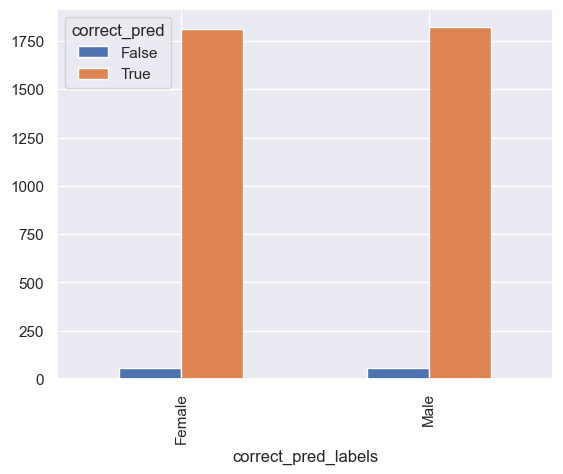

In [74]:
def plot_incorrect_pred(correct_labels,correct_pred):
    pd.crosstab(df_prediction[correct_labels],df_prediction[correct_pred]).plot(kind='bar')
    
plot_incorrect_pred('correct_pred_labels','correct_pred')


# Model Tuning 

what is model tuning ? model tunning is trying to determine the parameters of your model (these are also known as "hyperparameters") 
that maximize the model performance.

In [81]:
for reg_param in (7.1,7.2,7.5):
    # print(reg_param)
    model = LogisticRegression(max_iter=1000,C=reg_param)
    accuracies=cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")
    print(np.mean(accuracies))

0.9698666666666668
0.9698666666666668
0.9698666666666668
0.9696


# Final Model

In [82]:
model = LogisticRegression(max_iter=1000,C=7.5)
df_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_val
2674,1,11.5,5.2,0,0,0,0,Female,1
3485,1,13.5,6.0,0,0,0,0,Female,1
4125,1,14.5,5.3,1,1,1,1,Male,0
397,1,12.5,7.0,0,1,1,1,Male,0
3327,1,11.4,5.2,0,0,1,0,Female,1
...,...,...,...,...,...,...,...,...,...
143,1,12.7,5.6,0,0,0,0,Female,1
3164,0,13.1,5.1,0,0,0,0,Female,1
4616,1,11.9,6.3,0,1,0,1,Female,1
4377,1,14.0,6.4,0,0,0,0,Female,1


## how well does our model do with test data

In [83]:
x_test=df_test.drop(columns=['gender','gender_val']).values
y_test=df_test['gender_val'].values

In [84]:
# train our final model using our full training dataset
model.fit(x_train,y_train)

LogisticRegression(C=7.5, max_iter=1000)

In [85]:
y_test_pred=model.predict(x_test)

In [86]:
test_set_correctly_classified=y_test_pred==y_test

In [87]:
print(f"Accuracy is {np.mean(test_set_correctly_classified*100)}")

Accuracy is 96.56274980015988


In [88]:
df_prediction_test=df_test.copy()

In [89]:
df_prediction_test['correct_pred']= test_set_correctly_classified

In [90]:
df_prediction_test['prediction']=y_test_pred
df_prediction_test
df_prediction_test['correct_pred_labels']=df_prediction_test['prediction'].map({0:"Male",1:"Female"})


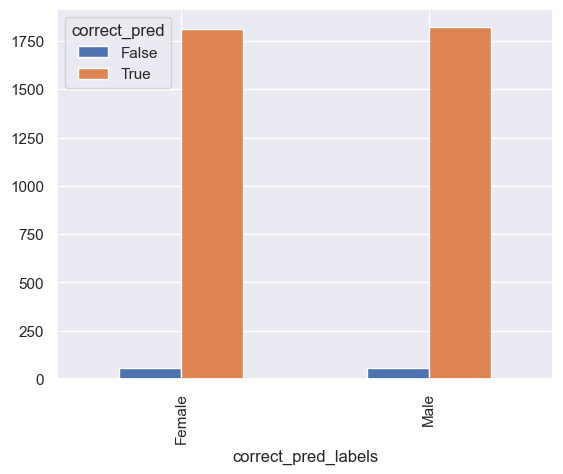

In [91]:
plot_incorrect_pred('correct_pred_labels','correct_pred')